In [ ]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as  nn
import matplotlib.pyplot as plt
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from google.colab import drive
from torch.utils.data import Dataset
drive.mount('/content/drive')
from torchvision.datasets import EMNIST
from torchvision.utils import save_image
import albumentations
import albumentations.pytorch
from PIL import Image
import time



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset_path_emojis = '/content/drive/MyDrive/MOSAIC_PS1/train_data/Emoji Dataset'
test_dataset_path_emojis = '/content/drive/MyDrive/MOSAIC_PS1/test_data/Emoji Dataset'


In [ ]:
train_transforms = transforms.Compose([
      # transforms.ToPILImage(),
      # transforms.Resize((28,28)),
      
      
      # # transforms.RandomHorizontalFlip(), changes kr skte hai
      # # transforms.RandomRotation(60),changes kr skte hai
      # # cv2.threshold(transforms.Grayscale(num_output_channels=1),190,255,cv2.THRESH_BINARY_INV) ,
      # transforms.Grayscale(num_output_channels=1),
      # transforms.Lambda(lambda x: torchvision.transforms.functional.invert(x)),
      # transforms.ToTensor(),
      # # transforms.CenterCrop(10),Negative(),
      
      # transforms.Normalize((0, 0, 0), (1, 1, 1)),
      transforms.Resize((28,28)),
      # transforms.RandomRotation(degrees = 45),
      # transforms.RandomHorizontalFlip(p = 0.3),
      # transforms.RandomVerticalFlip(p = 0.4),
      transforms.ToTensor(),
      transforms.Lambda(lambda x: torchvision.transforms.functional.invert(x)),
      transforms.Normalize((0, 0, 0), (1, 1, 1)),
      transforms.Grayscale(num_output_channels=1)
])

test_transforms = transforms.Compose([
      transforms.Resize((28,28)),
      transforms.RandomRotation(degrees=45),
      # transforms.Resize((28,28)),
      # transforms.RandomRotation(degrees = 45),
      # transforms.RandomHorizontalFlip(p = 0.3),
      # transforms.RandomVerticalFlip(p = 0.4),
      transforms.ToTensor(),
      transforms.Lambda(lambda x: torchvision.transforms.functional.invert(x)),
      transforms.Normalize((0, 0, 0), (1, 1, 1)),
      transforms.Grayscale(num_output_channels=1)
      
])

In [ ]:
train_dataset = EMNIST(root="data/", split="letters", download=True, train=True, 
                transform=transforms.Compose([
                    lambda img: transforms.functional.rotate(img, -90),
                    lambda img: transforms.functional.hflip(img),
                    transforms.ToTensor()
                ]))
                
test_dataset = EMNIST(root="data/", split="letters", download=True, train=False, 
                transform=transforms.Compose([
                                           
                    lambda img: transforms.functional.rotate(img, -90),
                    lambda img: transforms.functional.hflip(img),
                    transforms.ToTensor()
                ]))

In [ ]:
train_dataset_emojis = torchvision.datasets.ImageFolder(root = train_dataset_path_emojis ,transform = train_transforms)
test_dataset_emojis = torchvision.datasets.ImageFolder(root = test_dataset_path_emojis,transform =test_transforms)

# albumentations_dataset = AlbumentationsDataset(
#     file_paths=train_dataset_path_emojis,
#     labels=[0,1,2,3,4,5,6],
#     transform=albumentations_transform,
# )

In [ ]:
print(train_dataset_emojis)
print(train_dataset)
# print(train_dataset.shape)


Dataset ImageFolder
    Number of datapoints: 210
    Root location: /content/drive/MyDrive/MOSAIC_PS1/train_data/Emoji Dataset
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Lambda()
               Normalize(mean=(0, 0, 0), std=(1, 1, 1))
               Grayscale(num_output_channels=1)
           )
Dataset EMNIST
    Number of datapoints: 124800
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               <function <lambda> at 0x7efd6a9625f0>
               <function <lambda> at 0x7efd6a9623b0>
               ToTensor()
           )


In [ ]:
print("Total No of Images in EMNIST dataset:", len(train_dataset) + len(test_dataset))
print("No of images in Training dataset:    ",len(train_dataset))
print("No of images in Testing dataset:     ",len(test_dataset))
l = train_dataset.classes
l.sort()
print("No of classes: ",len(l))
print("List of all classes")
print(l)
classes = train_dataset_emojis.classes
print(classes)

Total No of Images in EMNIST dataset: 145600
No of images in Training dataset:     124800
No of images in Testing dataset:      20800
No of classes:  27
List of all classes
['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['checkmark', 'cloud', 'croissant', 'heart', 'laugh', 'smile', 'sun']


In [ ]:
# This helper funcation convert the output index [0-61] into character [0-9],[A-Z],[a-z]

def to_char(num):
    if num<10:
        return str(num)
    elif num < 36:
        return chr(num+55)
    else:
        return chr(num+61)


# This is reverse of above function. Convert character [0-9],[A-Z],[a-z] into index [0-61]
def to_index(char):
    if ord(char)<59:
        return ord(char)-48
    elif ord(char)<95:
        return ord(char)-55
    else:
        return ord(char)-61


def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset,batch_size = 7 , shuffle = True)
  batch  = next(iter(loader))
  images, labels =batch

  grid = torchvision.utils.make_grid(images,nrow = 1)
  plt.figure(figsize = (11,11) )
  plt.imshow(np.transpose(grid,(1,2,0)))
  print('labels: ',labels+1)

labels:  tensor([7, 6, 7, 4, 5, 1, 1])


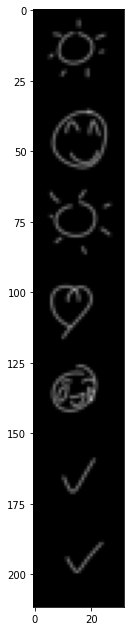

In [ ]:
# train_dataset_emojis = torchvision.datasets.ImageFolder(root = train_dataset_path_emojis ,transform = train_transforms)

show_transformed_images(train_dataset_emojis)

labels:  tensor([25, 24, 19, 21, 17, 18,  5,  7,  7, 26, 20,  9, 17,  1, 22,  4, 19, 20,
         8, 26,  7, 18,  6,  7,  8,  8, 11, 11])


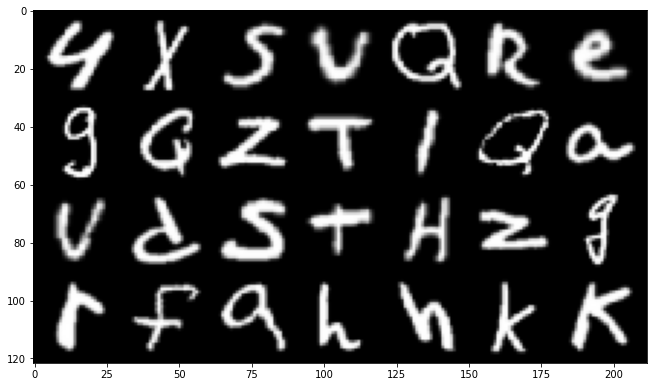

In [ ]:
def show_example(data):
    loader = torch.utils.data.DataLoader(data,batch_size = 28 , shuffle = True)
    batch  = next(iter(loader))
    images, labels =batch

    grid = torchvision.utils.make_grid(images,nrow = 7)
    plt.figure(figsize = (11,11) )
    plt.imshow(np.transpose(grid,(1,2,0)))
    print('labels: ',labels)
show_example(train_dataset)

In [ ]:
batch_size = 10
batch_size1 = 7 
train_loader1 = torch.utils.data.DataLoader(train_dataset_emojis, batch_size=batch_size1,
                                          shuffle=True)
test_loader1 = torch.utils.data.DataLoader(test_dataset_emojis, batch_size=batch_size1,
                                          shuffle=False)


# classes = ('1','2','3','4','5','6','7')

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

In [ ]:
# set the device on which the model will be trained
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
#### end code here ####
print(device)

cuda:0


In [ ]:
#letters

class CNNModel(nn.Module):
      def __init__(self):
          super(CNNModel,self).__init__()

          #Convolution :
          self.cnn1 = nn.Conv2d(in_channels = 1 ,out_channels = 16 , kernel_size = 3, stride = 1 , padding = 0)
          self.relu1 = nn.ReLU()

          #Max pool :
          self.maxpool1 = nn.MaxPool2d(kernel_size = 2)

          #Convolution 2
          self.cnn2 = nn.Conv2d(in_channels = 16 ,out_channels = 32 , kernel_size = 3, stride = 1 , padding = 0)
          self.relu2 = nn.ReLU()

          self.maxpool2 = nn.MaxPool2d(kernel_size =2 )

          self.fc1 = nn.Linear(800,27)
          
          
      def forward(self,x):
          out = self.cnn1(x)
          out = self.relu1(out)

          out = self.maxpool1(out)

          out = self.cnn2(out)
          out = self.relu2(out)

          out = self.maxpool2(out)

          out = out.view(out.size(0),-1)

          out = self.fc1(out)
          
          

          return out
          


In [ ]:
model = CNNModel().to(device)
model


CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=27, bias=True)
)

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("number of parameters/weights ", pytorch_total_params)

number of parameters/weights  26427


In [ ]:
# Optimizer
#### start code here ####
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#### end code here ####

In [ ]:
class CNNModel1(nn.Module):
      def __init__(self):
          super(CNNModel1,self).__init__()

          #Convolution :
          self.cnn1 = nn.Conv2d(in_channels = 1 ,out_channels = 16 , kernel_size = 3, stride = 1 , padding = 0)
          self.relu1 = nn.ReLU()
          self.maxpool1 = nn.MaxPool2d(kernel_size = (2,2))

          #Convolution 2
          self.cnn2 = nn.Conv2d(in_channels = 16 ,out_channels = 32 , kernel_size = 3, stride = 1 , padding = 0)
          self.relu2 = nn.ReLU()
          self.maxpool2 = nn.MaxPool2d(kernel_size =2 )

          self.fc1 = nn.Linear(800,500)
          self.relu3 = nn.ReLU()

          self.fc2 = nn.Linear(500,7)          
          
      def forward(self,x):
          out = self.cnn1(x)
          out = self.relu1(out)
          out = self.maxpool1(out)

          out = self.cnn2(out)
          out = self.relu2(out)
          out = self.maxpool2(out)

          out = out.view(out.size(0),-1)

          out = self.fc1(out)
          out = self.relu3(out)

          out = self.fc2(out)

          return out
          

In [ ]:
model1 = CNNModel1().to(device)
model1

CNNModel1(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=500, out_features=7, bias=True)
)

In [ ]:
pytorch_total_params1 = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print("number of parameters/weights ", pytorch_total_params1)

number of parameters/weights  408807


In [ ]:
learning_rate = 0.01
optimizer1 = torch.optim.SGD(model1.parameters(), lr=learning_rate)
#### end code here ####

In [ ]:
# Cross Entropy Loss 
#### start code here ####
error = nn.CrossEntropyLoss() #loss
#### end code here ####

In [ ]:
#for letters

num_epochs = 10

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = error(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i) % 10000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')




Epoch [1/10], Step [1/12480], Loss: 2.8674


KeyboardInterrupt: ignored

In [ ]:
PATH = '/content/drive/MyDrive/MOSAIC_PS1/letters.h5'
torch.save(model.state_dict(), PATH)

In [ ]:
#for letters
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(27)]
    n_class_samples = [0 for i in range(27)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        # print(labels)
        outputs = model(images)
        # print(outputs)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        # print(labels)
        # print('\n')
        # print(predicted)
        # print(predicted.sum())
        # print(predicted.sum().item())
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(len(labels)):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the letters {acc} %')

    for i in range(27):
        acc=0
        if(n_class_samples[i] != 0): acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {l[i]}: {acc} %')

Accuracy of the letters 79.25 %
Accuracy of N/A: 0 %
Accuracy of a: 71.375 %
Accuracy of b: 71.125 %
Accuracy of c: 89.25 %
Accuracy of d: 60.625 %
Accuracy of e: 87.125 %
Accuracy of f: 62.0 %
Accuracy of g: 64.25 %
Accuracy of h: 76.5 %
Accuracy of i: 81.875 %
Accuracy of j: 87.25 %
Accuracy of k: 83.125 %
Accuracy of l: 43.0 %
Accuracy of m: 92.75 %
Accuracy of n: 72.25 %
Accuracy of o: 95.875 %
Accuracy of p: 90.75 %
Accuracy of q: 63.0 %
Accuracy of r: 79.125 %
Accuracy of s: 88.625 %
Accuracy of t: 87.375 %
Accuracy of u: 78.875 %
Accuracy of v: 79.0 %
Accuracy of w: 92.375 %
Accuracy of x: 90.625 %
Accuracy of y: 82.875 %
Accuracy of z: 89.5 %


In [ ]:
#for emojis
num_epochs = 100
# train_dataset_emojis = torchvision.datasets.ImageFolder(root = train_dataset_path_emojis ,transform = train_transforms)
# test_dataset_emojis = torchvision.datasets.ImageFolder(root = test_dataset_path_emojis,transform =test_transforms)
# train_loader1 = torch.utils.data.DataLoader(train_dataset_emojis, batch_size=batch_size1,
#                                           shuffle=True)
# test_loader1 = torch.utils.data.DataLoader(test_dataset_emojis, batch_size=batch_size1,
#                                           shuffle=False)
n_total_steps = len(train_loader1)
for epoch in range(num_epochs):
  # for j in range(10):
  #   train_dataset_emojis = torchvision.datasets.ImageFolder(root = train_dataset_path_emojis ,transform = train_transforms)
  #   train_loader1 = torch.utils.data.DataLoader(train_dataset_emojis, batch_size=batch_size1,shuffle=True)
    for i, (images, labels) in enumerate(train_loader1):
        
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model1(images)
        loss = error(outputs, labels)

        # Backward and optimize
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

        if (i) % 10000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')


Epoch [1/100], Step [1/30], Loss: 1.9493
Epoch [2/100], Step [1/30], Loss: 1.9492
Epoch [3/100], Step [1/30], Loss: 1.9551
Epoch [4/100], Step [1/30], Loss: 1.9423
Epoch [5/100], Step [1/30], Loss: 1.9390
Epoch [6/100], Step [1/30], Loss: 1.9318
Epoch [7/100], Step [1/30], Loss: 1.9397
Epoch [8/100], Step [1/30], Loss: 1.9315
Epoch [9/100], Step [1/30], Loss: 1.9412
Epoch [10/100], Step [1/30], Loss: 1.9273
Epoch [11/100], Step [1/30], Loss: 1.9358
Epoch [12/100], Step [1/30], Loss: 1.9405
Epoch [13/100], Step [1/30], Loss: 1.9221
Epoch [14/100], Step [1/30], Loss: 1.9216
Epoch [15/100], Step [1/30], Loss: 1.9179
Epoch [16/100], Step [1/30], Loss: 1.9042
Epoch [17/100], Step [1/30], Loss: 1.8706
Epoch [18/100], Step [1/30], Loss: 1.8937
Epoch [19/100], Step [1/30], Loss: 1.8849
Epoch [20/100], Step [1/30], Loss: 1.9047
Epoch [21/100], Step [1/30], Loss: 1.8727
Epoch [22/100], Step [1/30], Loss: 1.8788
Epoch [23/100], Step [1/30], Loss: 1.9069
Epoch [24/100], Step [1/30], Loss: 1.8706
E

In [ ]:
PATH = '/content/drive/MyDrive/MOSAIC_PS1/emojis.h5'
torch.save(model1.state_dict(), PATH)

In [ ]:
#for emojis
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(7)]
    n_class_samples = [0 for i in range(7)]
    # for j in range(10):
    #   test_dataset_emojis = torchvision.datasets.ImageFolder(root = test_dataset_path_emojis ,transform = test_transforms)
    #   test_loader1 = torch.utils.data.DataLoader(test_dataset_emojis, batch_size=batch_size1,shuffle=False)
      
    for images, labels in test_loader1:
        images = images.to(device)
        
        labels = labels.to(device)
        # print(labels)
        outputs = model1(images)
        # print(outputs)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        # print(labels)
        # print('\n')
        # print(predicted)
        # print(predicted.sum())
        # print(predicted.sum().item())
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(len(labels)):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the emojis: {acc} %')

    for i in range(7):
        acc=0
        if(n_class_samples[i] != 0): acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the emojis: 67.36111111111111 %
Accuracy of checkmark: 100.0 %
Accuracy of cloud: 60.0 %
Accuracy of croissant: 55.0 %
Accuracy of heart: 38.095238095238095 %
Accuracy of laugh: 100.0 %
Accuracy of smile: 57.142857142857146 %
Accuracy of sun: 60.0 %


In [ ]:
def segmentCaptcha(img):
  img = cv2.resize(img, (800,300), interpolation = cv2.INTER_AREA)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  _, th1 = cv2.threshold(img_gray,190, 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((5,5), dtype = np.uint8)
  img_dil = cv2.dilate(th1, kernel, iterations=2)

  contours, _ = cv2.findContours(img_dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
  sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
  img_crops = []
  k=0
  for i, ctr in enumerate(sorted_ctrs):
      x, y, w, h = cv2.boundingRect(ctr)

      
      # plt.imshow(rect, cmap="gray")
      if w*h>1600:
        crop_img = th1[y:y+h, x:x+w]
        
        rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        crop_img = cv2.resize(crop_img, (28, 28), interpolation = cv2.INTER_AREA)
        k+=1
        img_crops.append(crop_img)

  return img_crops, rect

In [ ]:
img = cv2.imread('/content/drive/MyDrive/MOSAIC_PS1/IMG_20220405_103743_864.jpg')
img_crops, rect = segmentCaptcha(img)


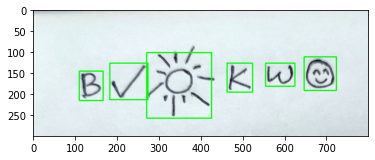

In [ ]:
plt.imshow(rect, cmap = 'gray')
plt.show()

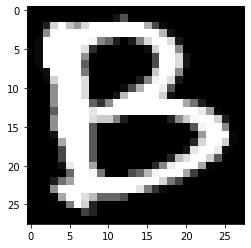

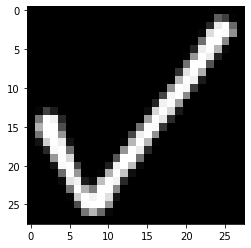

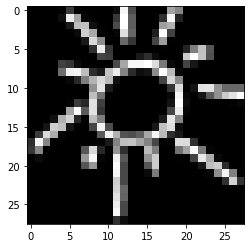

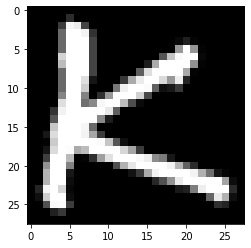

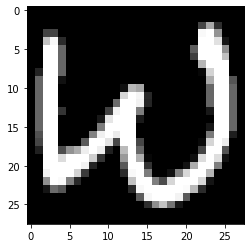

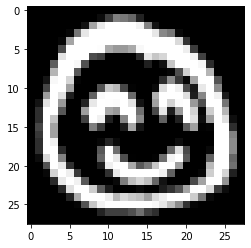

In [ ]:

for img in img_crops:
  plt.imshow(img, cmap = 'gray')
  plt.show()

In [ ]:
img_crops = np.array(img_crops)
img_crops = torch.Tensor(img_crops)

In [ ]:
inputs  = img_crops
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
# inputs= inputs.to(device)


In [ ]:
letter_model = CNNModel()

In [ ]:
letter_model.load_state_dict(torch.load('/content/drive/MyDrive/MOSAIC_PS1/letters.h5'))

<All keys matched successfully>

In [ ]:
letter_model.eval()

CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=27, bias=True)
)

In [ ]:
# print(images[0].shape)
# len(test_loader1)

In [ ]:
# inputs1=inputs1.unsqueeze(0)
# inputs1=inputs1.unsqueeze(0)
# # inputs1 = inputs1.cuda()
# # torch.reshape(inputs1,(1,1,28,28))
# print(inputs1.shape)

torch.Size([1, 1, 1, 1, 28, 28])


In [ ]:
emoji_model = CNNModel1()

In [ ]:
emoji_model.load_state_dict(torch.load('/content/drive/MyDrive/MOSAIC_PS1/emojis.h5'))

<All keys matched successfully>

In [ ]:
emoji_model.eval()

CNNModel1(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=500, out_features=7, bias=True)
)

In [ ]:
for inputs1 in inputs:
  inputs1=inputs1.unsqueeze(0)
  inputs1=inputs1.unsqueeze(0)
  # outp = letter_model(inputs1)
  # _, pr = torch.max(outp.data,1)
  # print(l[pr.item()])
  outp1= emoji_model(inputs1)
  _, pred1 = torch.max(outp1,1)
  print(classes[pred1.item()])

laugh
checkmark
laugh
smile
checkmark
laugh


In [ ]:
outp1= emoji_model(inputs1)

In [ ]:
_, pred1 = torch.max(outp1,1)

In [ ]:
print(classes[pred1.item()])

laugh
